## Ch 14 - Joint Source-Channel Coding

Reference: Ch 14 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
)

### Thm 14.1 (2-DMS over DM-MAC)


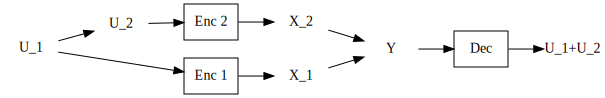

In [2]:
X1, X2 = rv_array("X", 1, 3)
Y = rv("Y")
U1, U2 = rv_array("U", 1, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()                   # Define multiple access channel
model.add_edge(U1, U2)                  # Correlated sources U1, U2
model.add_node(U1, X1, label = "Enc 1") # Encoder 1 maps U1 to X1
model.add_node(U2, X2, label = "Enc 2") # Encoder 2 maps U2 to X2
model.add_edge(X1+X2, Y)                # Channel X1,X2 -> Y
model.add_node(Y, U1+U2, label = "Dec") # Decoder maps Y to U1,U2

# model.partition = [U1+U2, X1+X2+Y]

model.graph()                           # Draw diagram

In [3]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [4]:
# The inner bound in [Cover-El Gamal-Salehi 1980], 
# which is equivalent to the above
Q = rv("Q")
r_in = region(
    H(U1 | U2) <= I(X1 & Y | U2+X2+Q),
    H(U2 | U1) <= I(X2 & Y | U1+X1+Q),
    H(U1+U2) <= I(X1+X2 & Y | Q),
    bnet((U1, U2), (U1+Q, X1), (U2+Q, X2), (X1+X2, Y))
).exists(Q)
r_in

( ( H(U_1|U_2) <= I(X_1&Y|U_2+X_2+Q) )
 &( H(U_2|U_1) <= I(X_2&Y|U_1+X_1+Q) )
 &( H(U_1+U_2) <= I(X_1+X_2&Y|Q) )
 &( indep(Q, U_1+U_2) )
 &( markov(U_1, Q+U_2, X_2) )
 &( markov(U_2+X_2, Q+U_1, X_1) )
 &( markov(Q+U_1+U_2, X_1+X_2, Y) ) ).exists(Q)

In [5]:
(r_in >> r).proof()  # Prove one direction of equivalence

In [6]:
(r >> r_in).proof()  # Prove another direction of equivalence

### Thm 14.2 (2-DMS with Common Part over DM-MAC) (Not proved)


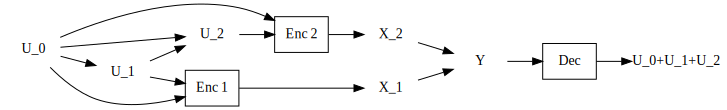

In [7]:
X1, X2 = rv_array("X", 1, 3)
Y = rv("Y")
U0, U1, U2 = rv_array("U", 0, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()                      # Define multiple access channel
model.add_edge(U0, U1)                     # Correlated sources U0, U1, U2
model.add_edge(U0+U1, U2)                  # Correlated sources U0, U1, U2
model.add_node(U0+U1, X1, label = "Enc 1") # Encoder 1 maps U0,U1 to X1
model.add_node(U0+U2, X2, label = "Enc 2") # Encoder 2 maps U0,U2 to X2
model.add_edge(X1+X2, Y)                   # Channel X1,X2 -> Y
model.add_node(Y, U0+U1+U2, label = "Dec") # Decoder maps Y to U0,U1,U2

# model.partition = [U0+U1+U2, X1+X2+Y]

model.graph()                           # Draw diagram

In [8]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [9]:
# The inner bound in [Cover-El Gamal-Salehi 1980]
W = rv("W")
r_in = region(
    H(U1 | U0+U2) <= I(X1 & Y | U0+U2+X2+W),
    H(U2 | U0+U1) <= I(X2 & Y | U0+U1+X1+W),
    H(U1+U2 | U0) <= I(X1+X2 & Y | U0+W),
    H(U0+U1+U2) <= I(X1+X2 & Y),
    bnet((U0, U1), (U0+U1, U2), (U0+U1+W, X1), (U0+U2+W, X2), (X1+X2, Y))
).exists(W)
r_in

( ( H(U_1|U_0+U_2) <= I(X_1&Y|U_0+U_2+X_2+W) )
 &( H(U_2|U_0+U_1) <= I(X_2&Y|U_0+U_1+X_1+W) )
 &( H(U_1+U_2|U_0) <= I(X_1+X_2&Y|U_0+W) )
 &( H(U_0+U_1+U_2) <= I(X_1+X_2&Y) )
 &( indep(W, U_1+U_2+U_0) )
 &( markov(U_2, W+U_0+U_1, X_1) )
 &( markov(U_1+X_1, W+U_0+U_2, X_2) )
 &( markov(W+U_1+U_2+U_0, X_1+X_2, Y) ) ).exists(W)

In [10]:
(r_in >> r).proof()  # Our bound is at least as large as Cover-El Gamal-Salehi

### Thm 14.3 (Gray-Wyner System)


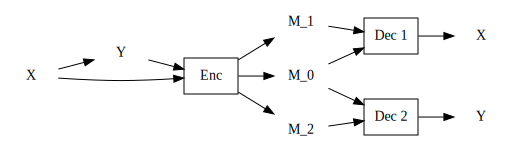

In [11]:
X, Y, U = rv("X, Y, U")
M0, M1, M2 = rv_array("M", 3)
R0, R1, R2 = real_array("R", 3)

model = CodingModel()         # Define Gray-Wyner system
model.set_rate(M0, R0)        # The rate of M0, M1, M2 are R0, R1, R2 resp.
model.set_rate(M1, R1)
model.set_rate(M2, R2)
model.add_edge(X, Y)          # X, Y are correlated source
model.add_node(X+Y, M0+M1+M2,
            label = "Enc")    # Encoder maps X,Y to M0,M1,M2
model.add_node(M0+M1, X,
            label = "Dec 1")  # Decoder 1 maps M0,M1 to X
model.add_node(M0+M2, Y,
            label = "Dec 2")  # Decoder 2 maps M0,M2 to Y

model.graph()                 # Draw diagram

In [12]:
# Automatic outer bound with 1 auxiliary, gets Gray-Wyner region [Gray-Wyner 1974]
r_gw = model.get_outer(1)
r_gw

( ( R_1 >= H(X|A) )
 &( R_2 >= H(Y|A) )
 &( R_0 >= I(A&X+Y) ) ).exists(A)

In [13]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [14]:
# Although the above region does not look like the Gray-Wyner region,
#  they are actually equivalent.

(r >> r_gw).solve().display()  # r implies r_gw
(r_gw >> r).solve().display()  # r_gw implies r

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# Output converse proof (is_proof = True for shorter proof)
# Lower search level to avoid modification to regions
with PsiOpts(auxsearch_level = 1):
    model.proof_outer(r_gw).display()

<IPython.core.display.Math object>

### Extremal Points and Corner Points

In [16]:
# Minimum sum rate is H(X, Y)
sumrate = r.minimum(R0 + R1 + R2, [R0, R1, R2])
sumrate

H(X+Y)

In [17]:
# Minimum weighted sum rate when R0 is counted twice is H(X)+H(Y)
wsumrate = r.minimum(R0 * 2 + R1 + R2, [R0, R1, R2])
wsumrate

H(X)+H(Y)

In [18]:
# Minimum symmetric rate
symrate = r.minimum(emax(R0, R1, R2), [R0, R1, R2])
symrate

(( universe() ).exists(A_M_0)).minimum(emax((1/2)*H(X)+(1/2)*I(A_M_0&Y|X), (1/2)*H(Y)+(1/2)*I(A_M_0&X|Y), (1/3)*H(X)+(1/3)*H(Y|A_M_0)+(1/3)*I(A_M_0&Y|X)))

In [19]:
# The corner point max R0 s.t. R0 + R1 = H(X), R0 + R2 = H(Y)
corner1 = (r & (R0 + R1 == H(X)) & (R0 + R2 == H(Y))).maximum(R0, [R0, R1, R2])
corner1

(( ( markov(A_M_0, X, Y) )
 &( markov(A_M_0, Y, X) ) ).exists(A_M_0)).maximum(I(A_M_0&Y))

In [20]:
# This is the Gacs-Korner common information [Gacs-Korner 1973]
(corner1 == gacs_korner(X & Y)).solve()

True
CompArray(
[[U, A_1],
 [A_M_0, A_1+U_1]])

In [21]:
# The corner point min R0 s.t. R0 + R1 + R2 = H(X,Y)
corner2 = (r & (R0 + R1 + R2 == H(X+Y))).minimum(R0, [R0, R1, R2])
corner2

(( ( markov(X, A_M_0, Y) ) ).exists(A_M_0)).minimum(I(A_M_0&X+Y))

In [22]:
# This is Wyner's common information [Wyner 1975]
(corner2 == wyner_ci(X & Y)).solve()

True
CompArray(
[[A_M_0, U_1],
 [U, A_1]])

In [23]:
# The corner point min R0 s.t. R0 + R2 = H(Y), R1 = H(X|Y)
corner3 = (r & (R0 + R2 == H(Y)) & (R1 == H(X|Y))).minimum(R0, [R0, R1, R2])
corner3

(( ( markov(X, A_M_0, Y) )
 &( markov(A_M_0, Y, X) ) ).exists(A_M_0)).minimum(I(A_M_0&Y))

In [24]:
# This is the necessary conditional entropy [Cuff-Permuter-Cover 2010] plus I(X;Y)
# We need the double Markov property [Csiszar-Korner 2011] to prove this
with dblmarkov().assumed():
    (corner3 <= H_nec(Y | X) + I(X & Y)).solve().display()
    (corner3 >= H_nec(Y | X) + I(X & Y)).solve().display()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Thm 14.4 (Broadcast Channel)

Skipped

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 14.
- T. Cover, A. El Gamal and M. Salehi, "Multiple access channels with arbitrarily correlated sources," IEEE Transactions on Information theory 26.6, pp. 648-657, 1980.
- R. M. Gray and A. D. Wyner, "Source coding for a simple network," Bell Syst. Tech. J., vol. 53, no. 9, pp. 1681–1721, 1974.
- P. Gács and J. Körner, "Common information is far less than mutual information," Problems Control Inf. Theory, vol. 2, no. 2, pp. 149–162, 1973.
- A. D. Wyner, "The common information of two dependent random variables," IEEE Trans. Inf. Theory, vol. IT-21, no. 2, pp. 163–179, Mar. 1975.
- P. W. Cuff, H. H. Permuter, and T. M. Cover, "Coordination capacity," IEEE Trans. Inf. Theory, vol. 56, no. 9, pp. 4181–4206, Sep. 2010.
- C. T. Li and A. El Gamal, "Extended Gray–Wyner system with complementary causal side information," IEEE Trans. Inf. Theory, vol. 64, no. 8, pp. 5862–5878, 2017
- I. Csiszár and J. Körner, "Information theory: coding theorems for discrete memoryless systems," Cambridge University Press, 2011.
